## Table of Contents
1. 🔗[Import libraries](#🔗Import)
2. 🔍[Reading Data](#🔍Reading-Data)
3. 📈[Exploratory Data Analysis (EDA)](#📈EDA)
4. 🏗️[Feature Engineering](#🏗️Feature-Engineering)
5. 🤖[Model Building](#🤖Model-Building)
6. 📊[Evaluation](#📊Evaluation)

## 🔗Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

## 🔍Reading-Data

In [2]:
df = pd.read_csv("/kaggle/input/student-scores/student-scores.csv")
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [3]:
df = df.drop(["id","first_name","last_name"],axis=1)

In [4]:
df = df.drop(["email"],axis=1)

In [5]:
df.isna().sum()

gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      2000 non-null   object
 1   part_time_job               2000 non-null   bool  
 2   absence_days                2000 non-null   int64 
 3   extracurricular_activities  2000 non-null   bool  
 4   weekly_self_study_hours     2000 non-null   int64 
 5   career_aspiration           2000 non-null   object
 6   math_score                  2000 non-null   int64 
 7   history_score               2000 non-null   int64 
 8   physics_score               2000 non-null   int64 
 9   chemistry_score             2000 non-null   int64 
 10  biology_score               2000 non-null   int64 
 11  english_score               2000 non-null   int64 
 12  geography_score             2000 non-null   int64 
dtypes: bool(2), int64(9), object(2)
memory usage: 17

In [9]:
marks = ["biology_score" , "chemistry_score","english_score" ,"geography_score" , "history_score","math_score","physics_score"]
highest_degree =[]
for i in marks :
    highest_degree.append(df[i].max())
print(highest_degree)


[100, 100, 99, 100, 100, 100, 100]


In [10]:
df["final_score"] = (df["biology_score"] + df["chemistry_score"] + df["english_score"] + df["geography_score"] + df ["history_score"] + df["math_score"] + df["physics_score"] ) / 700

## 📈EDA

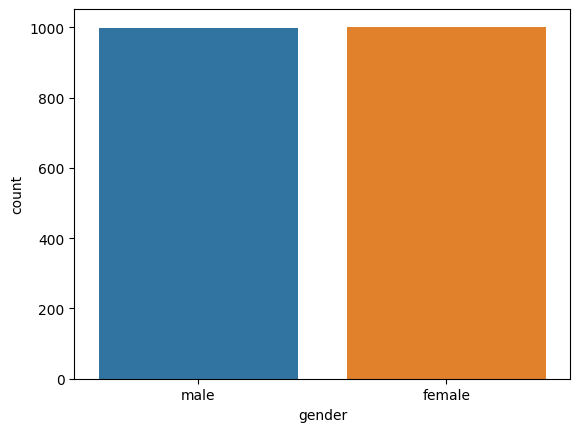

In [11]:
sns.countplot(x="gender",data=df)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

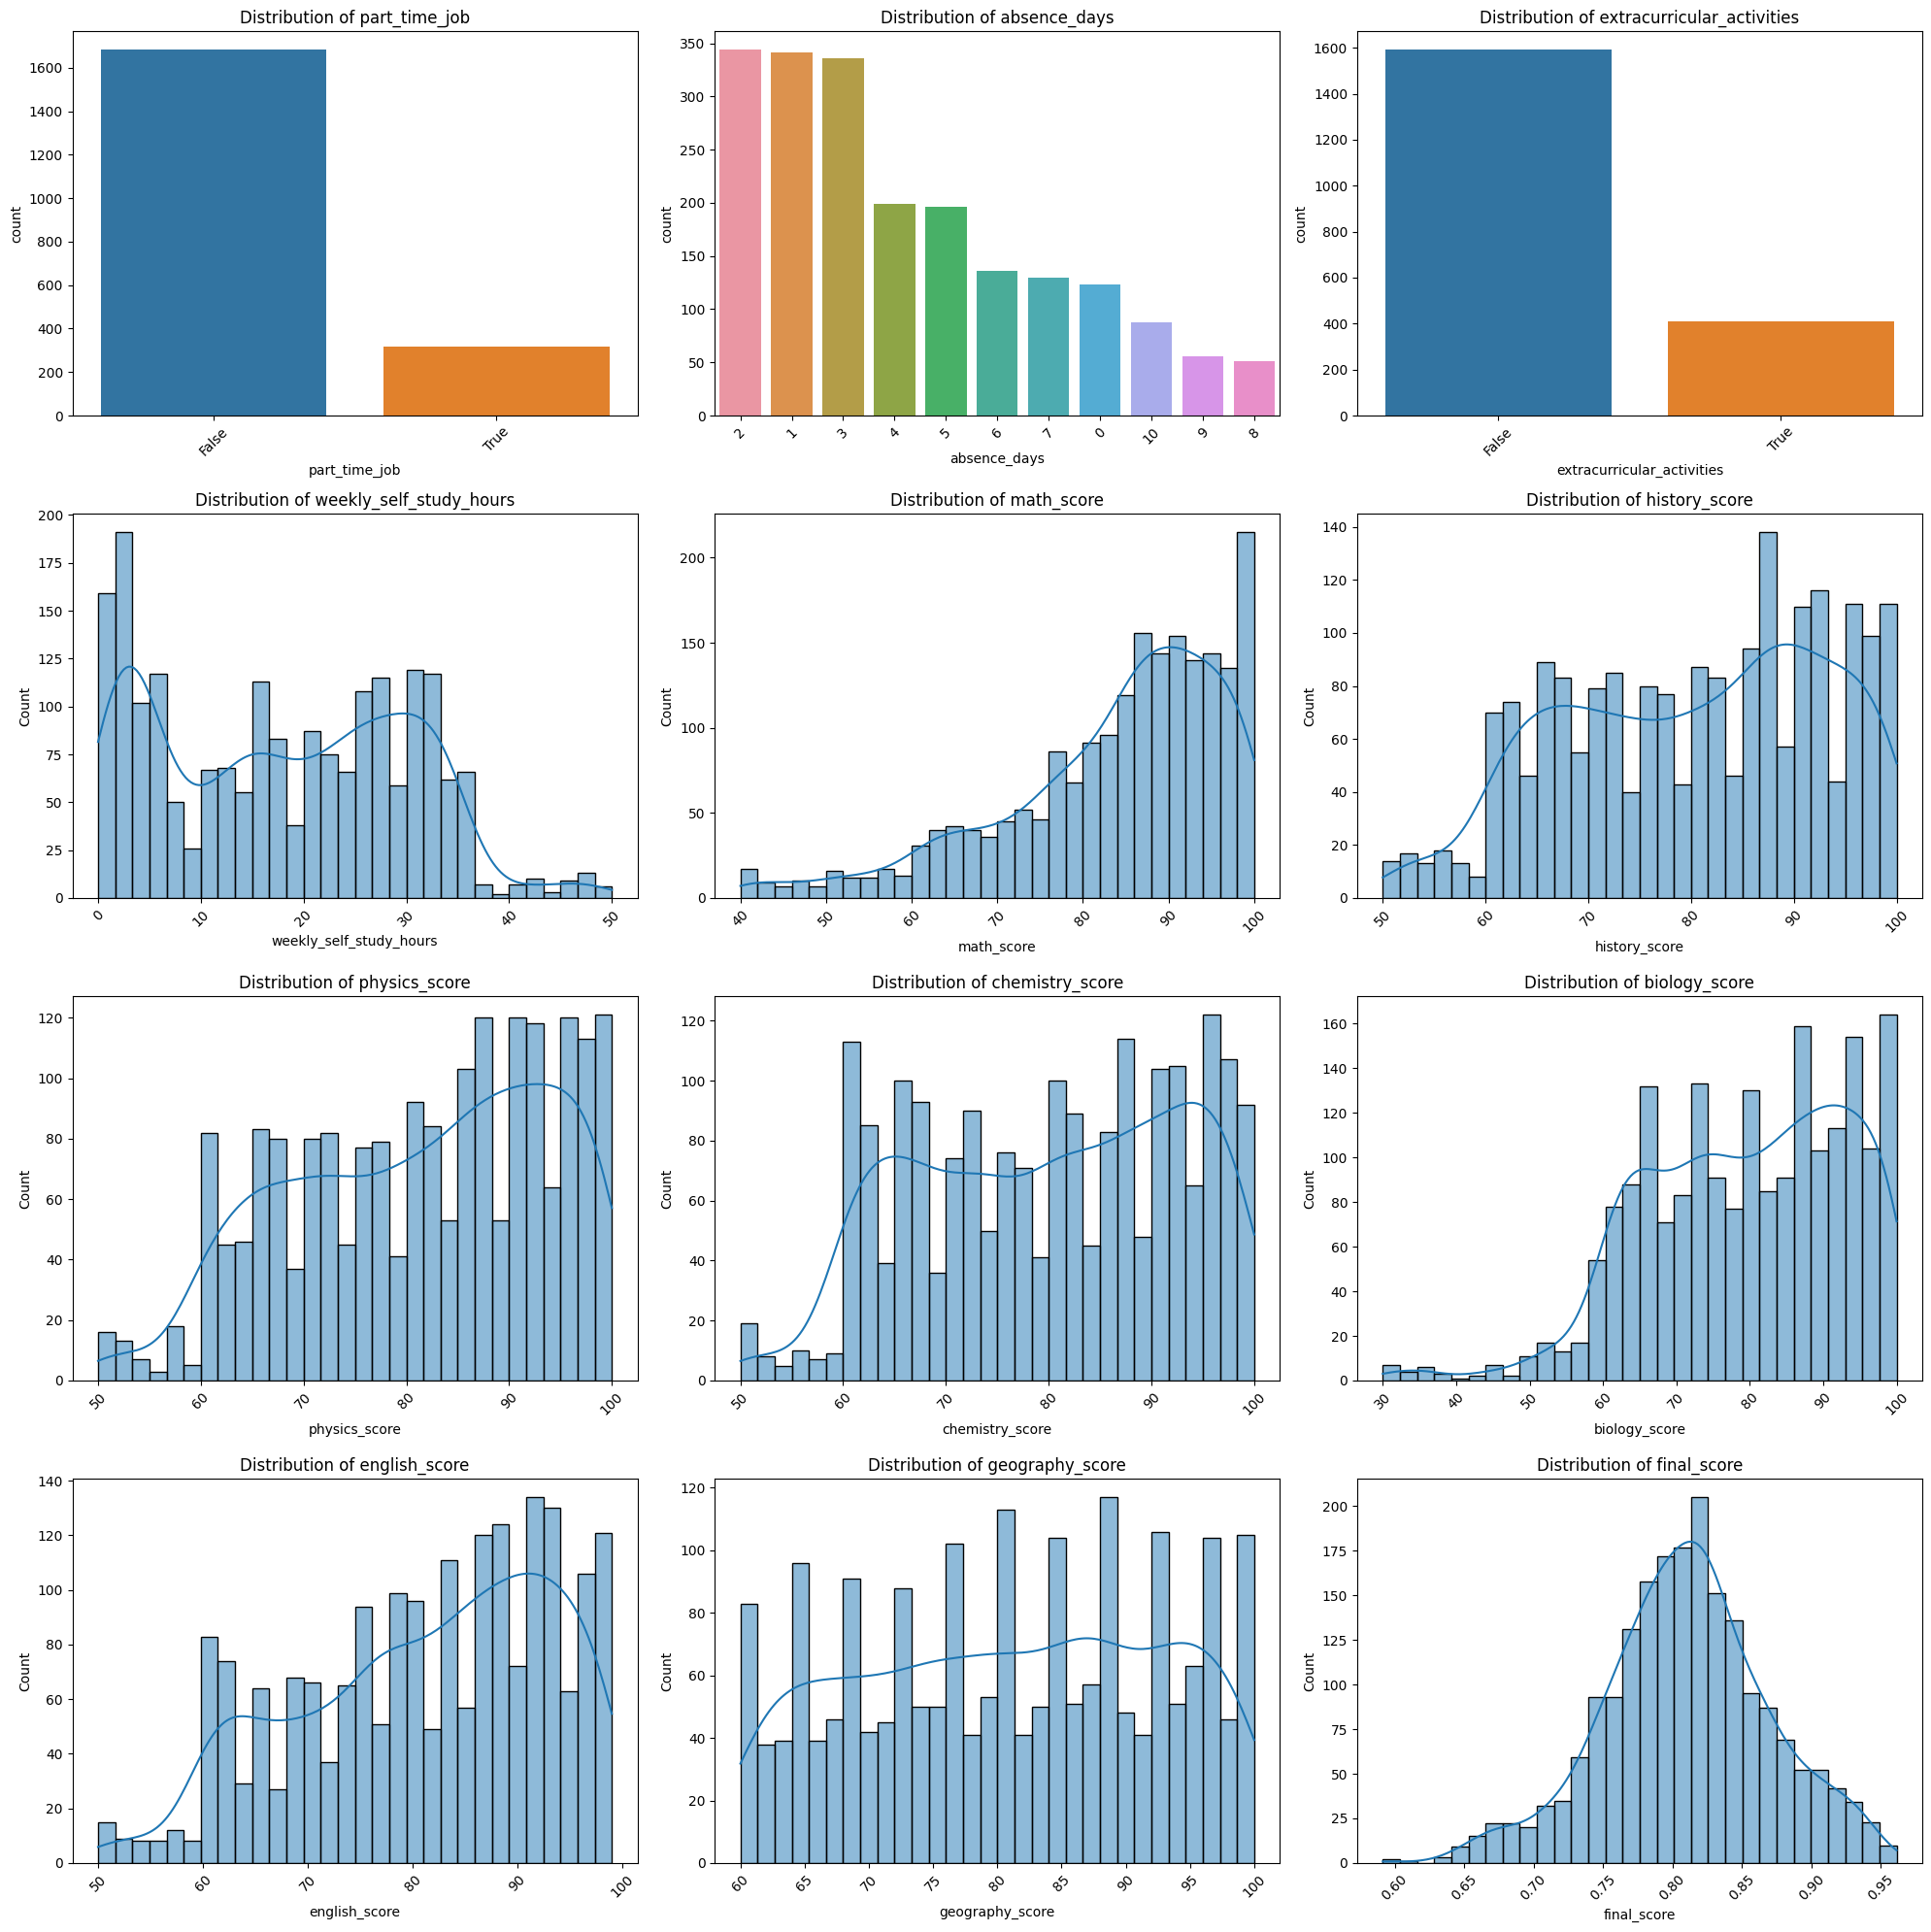

In [12]:
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(numeric_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(numeric_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

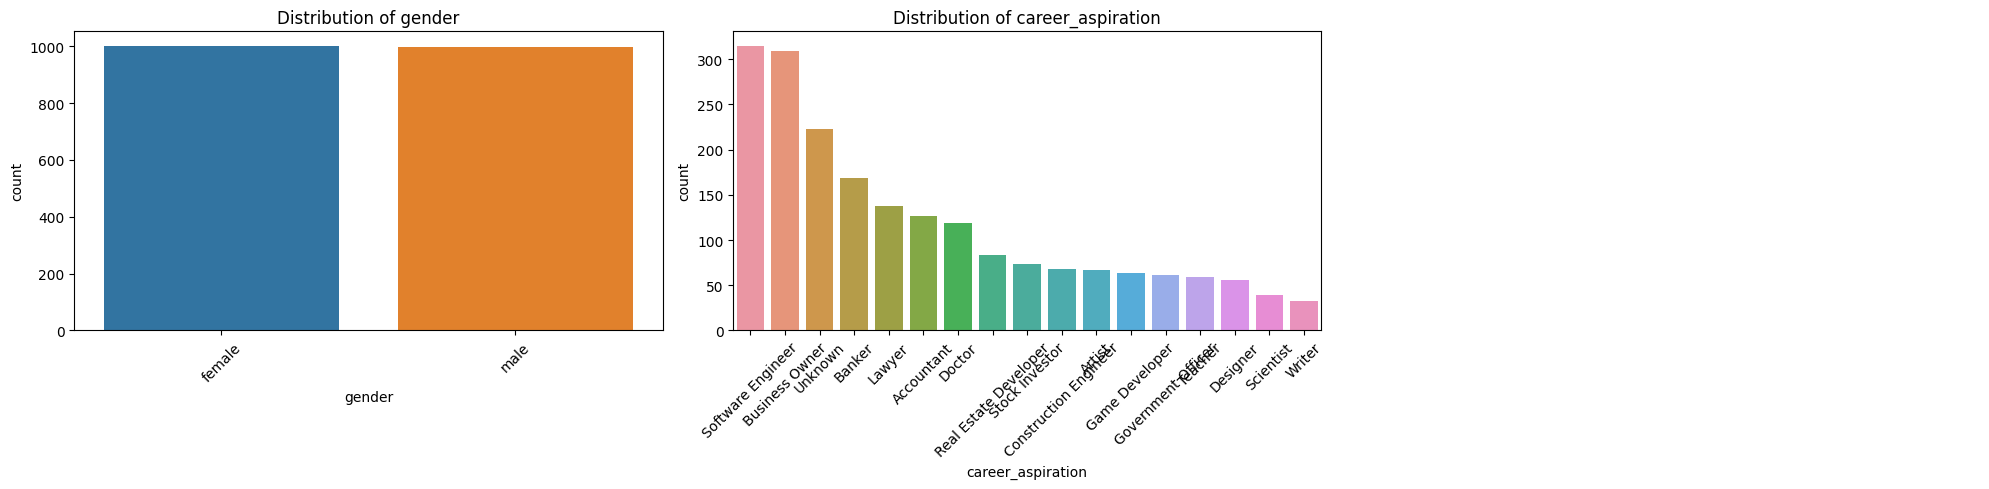

In [13]:
object_cols = df.select_dtypes(include="object").columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(object_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(object_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

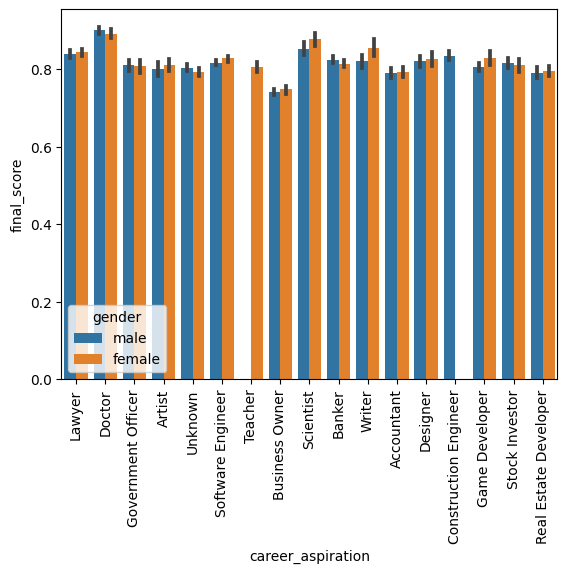

In [14]:
sns.barplot(x="career_aspiration",y="final_score",hue="gender",data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='weekly_self_study_hours', ylabel='final_score'>

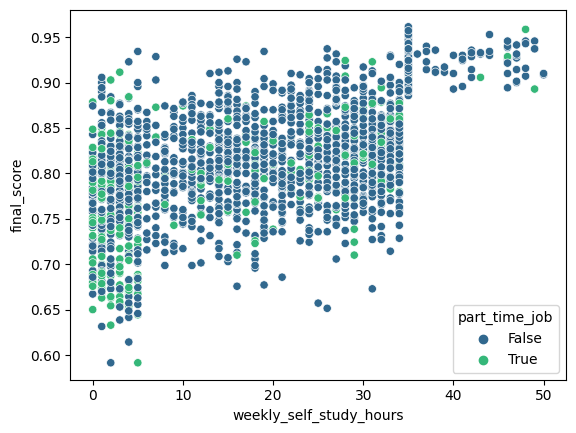

In [15]:
sns.scatterplot(x="weekly_self_study_hours",y="final_score",hue="part_time_job",palette="viridis",data=df)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: xlabel='absence_days', ylabel='final_score'>

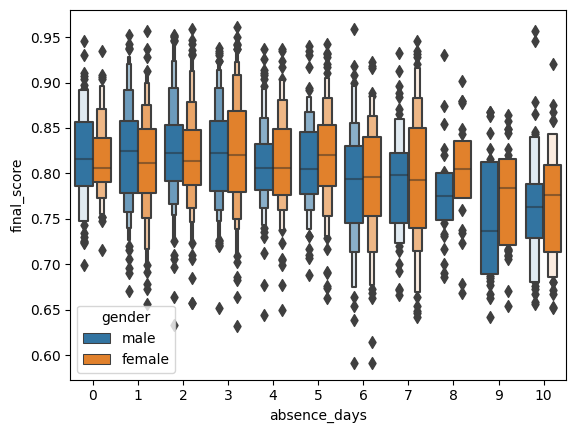

In [16]:
sns.boxenplot(x="absence_days",y="final_score",hue="gender",data=df)

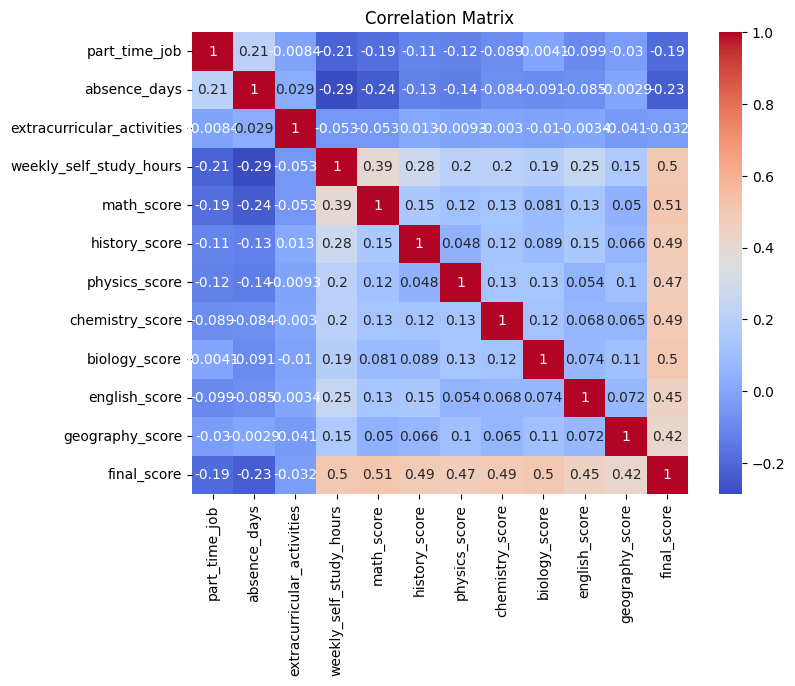

In [17]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

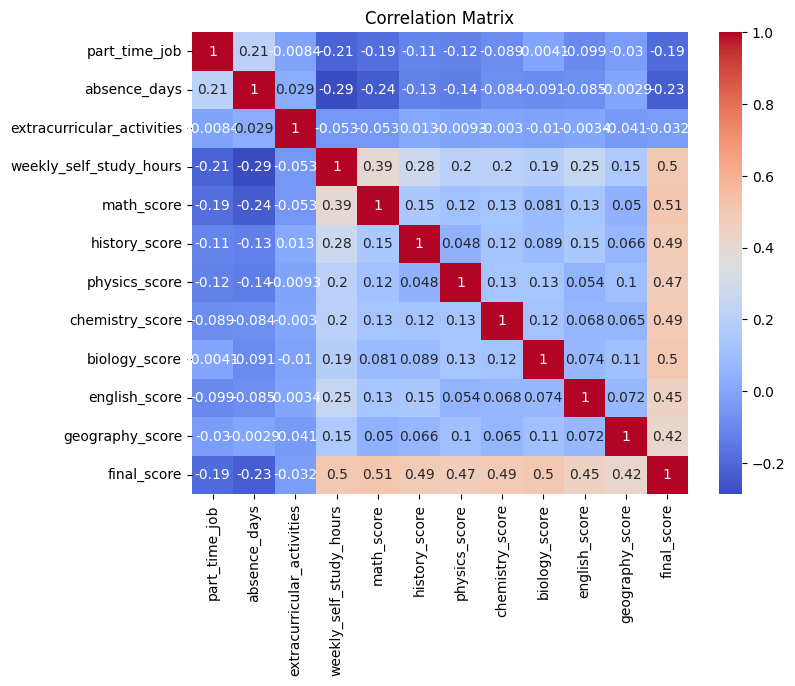

In [18]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 🏗️Feature-Engineering

In [19]:
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
df['part_time_job'] = df['part_time_job'].astype(int)
df['extracurricular_activities'] = df['extracurricular_activities'].astype(int)

## !!Note Here with this features the model will 100 acc in linear_reg but thats not logic in real_life you want to predict degree you extract or keep the degrees but this notebook only for learning 

In [21]:
df['stem_score_avg'] = df[['math_score', 'physics_score', 'chemistry_score', 'biology_score']].mean(axis=1)
df['humanities_score'] = df[['history_score', 'english_score', 'geography_score']].mean(axis=1)


In [22]:
df.columns

Index(['gender', 'part_time_job', 'absence_days', 'extracurricular_activities',
       'weekly_self_study_hours', 'career_aspiration', 'math_score',
       'history_score', 'physics_score', 'chemistry_score', 'biology_score',
       'english_score', 'geography_score', 'final_score', 'stem_score_avg',
       'humanities_score'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler

# Define features you want to scale
features_to_scale = [
    'absence_days',
    'weekly_self_study_hours',
    'stem_score_avg',
    'humanities_score',
    'math_score', 'physics_score', 'chemistry_score', 'biology_score',
    'history_score', 'english_score', 'geography_score'
    
    
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])



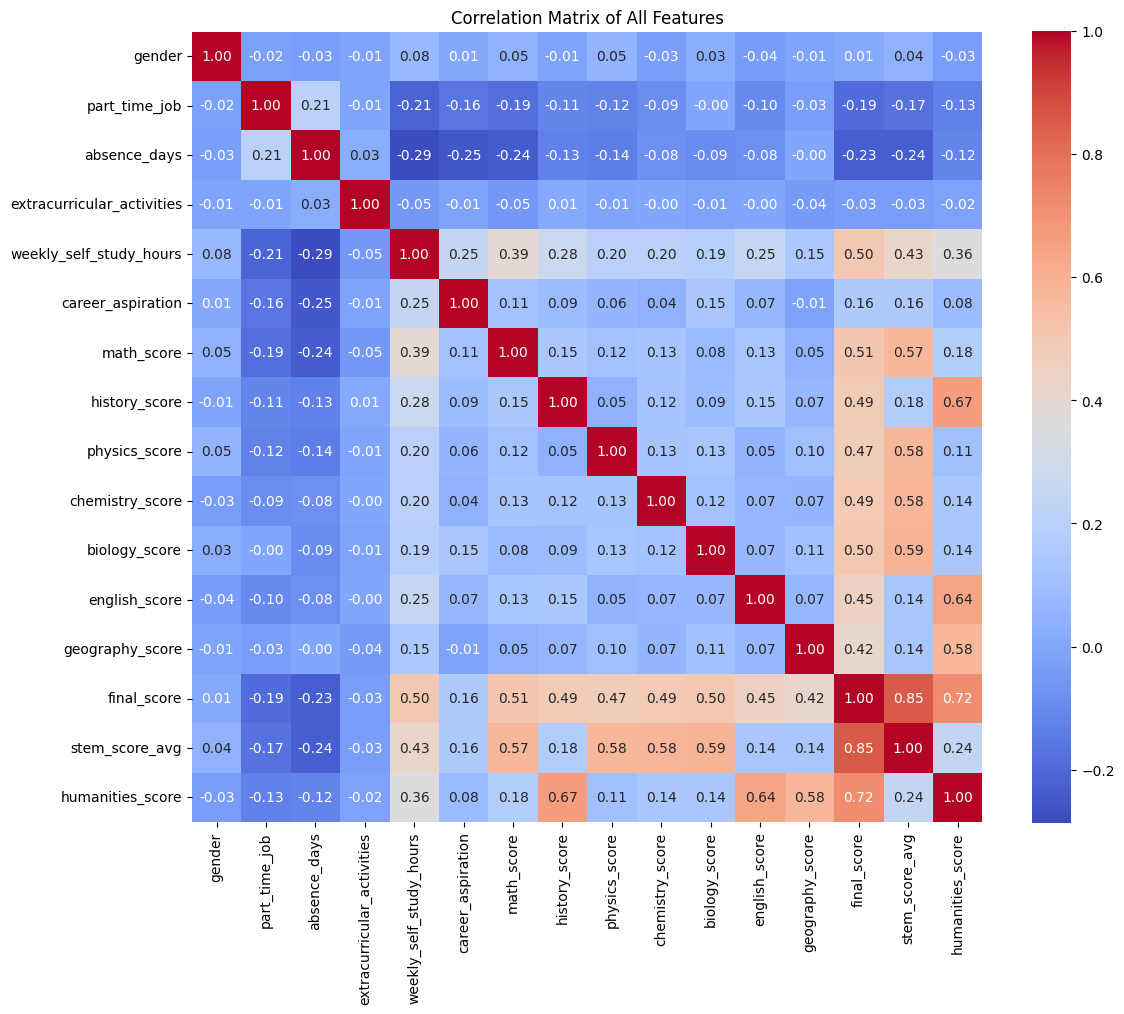

In [24]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

## 🤖Model-Building

In [25]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=['final_score'])
y = df['final_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)

# Evaluate
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


In [27]:
print("🔹 Linear Regression:")
print(f"   MSE: {mse_linear:.4f}")
print(f"   R² Score: {r2_linear:.4f}")

🔹 Linear Regression:
   MSE: 0.0000
   R² Score: 1.0000


In [28]:
from sklearn.preprocessing import PolynomialFeatures
for deg in [2, 3, 4, 5]:
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {deg}: MSE = {mse:.4f}, R² = {r2:.4f}")


Degree 2: MSE = 0.0000, R² = 1.0000
Degree 3: MSE = 0.0000, R² = 1.0000
Degree 4: MSE = 0.0001, R² = 0.9656
Degree 5: MSE = 0.0018, R² = 0.5830


## 📊Evaluation

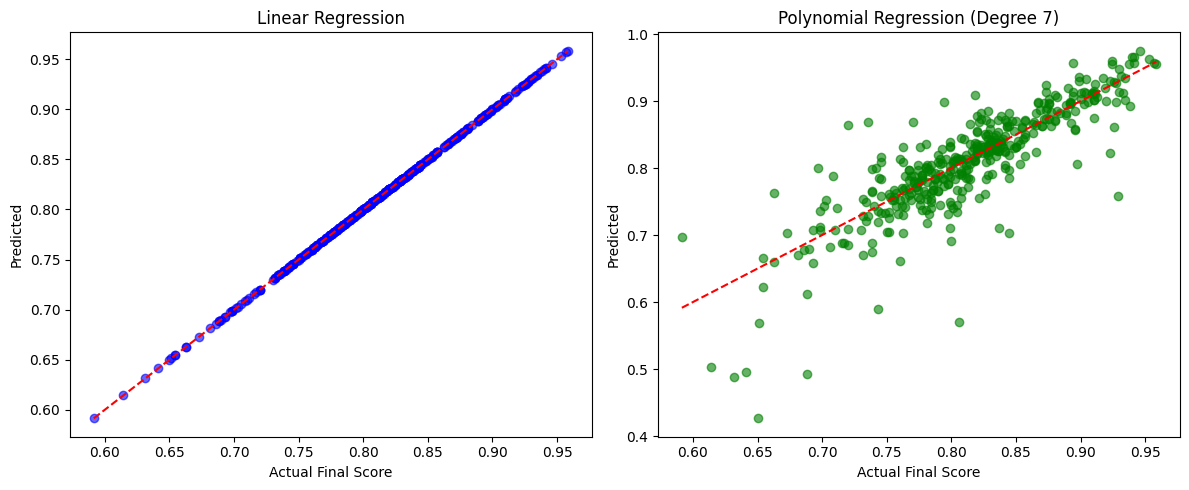

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted")
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted")
plt.title("Polynomial Regression (Degree 7)")

plt.tight_layout()
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"📊 {model_name} Evaluation")
    print(f"   ✅ MSE:  {mse:.4f}")
    print(f"   ✅ RMSE: {rmse:.4f}")
    print(f"   ✅ MAE:  {mae:.4f}")
    print(f"   ✅ R²:   {r2:.4f}")
    print("-" * 40)

# Evaluate both models
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred, "Polynomial Regression (Degree 7)")



📊 Linear Regression Evaluation
   ✅ MSE:  0.0000
   ✅ RMSE: 0.0000
   ✅ MAE:  0.0000
   ✅ R²:   1.0000
----------------------------------------
📊 Polynomial Regression (Degree 7) Evaluation
   ✅ MSE:  0.0018
   ✅ RMSE: 0.0423
   ✅ MAE:  0.0272
   ✅ R²:   0.5830
----------------------------------------
